In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [16]:
df=pd.read_csv('C:/Users/Teacher-5B773C/Downloads/datasets/encoded-Sample - Superstore - Modified -.csv')

In [17]:
df.head(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58


**Data Cleaning**

***removing duplicates***

In [18]:
duplicate_rows=df[df.duplicated()]
df=df.drop_duplicates()

***Format dates***

In [19]:
df['OrderDate']=pd.to_datetime(df['OrderDate'],format='%m/%d/%Y')
df['ShipDate']=pd.to_datetime(df['ShipDate'],format='%m/%d/%Y')

In [20]:
df.head(2)

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.91
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.58


***Format sales and Profit***

In [21]:
df['Sales']=df['Sales'].map('${:,.2f}'.format)
df['Profit']=df['Profit'].map('${:,.2f}'.format)

***Remove nulls***

In [22]:
null_val=df.isnull().sum()
null_val.head()

RowID        0
OrderID      0
OrderDate    0
ShipDate     0
ShipMode     0
dtype: int64

****Basic statistics****

***Total number of sales***

In [23]:
unique_sale_values=df['Sales'].unique()

In [24]:
unique_sale_values

array(['$261.96', '$731.94', '$14.62', ..., '$13.86', '$437.47',
       '$243.16'], dtype=object)

In [25]:
df['Sales']=df['Sales'].replace('[\$,]','',regex=True).astype(float)

In [26]:
ts=df['Sales'].sum()
print("Total sales:" ,'$',ts)

Total sales: $ 2297201.0700000003


***Average profit per order***

In [27]:
#average profit grouped by ORDERID 
df['Profit']=df['Profit'].replace('[\$,]','',regex=True).astype(float)
AV=df.groupby('OrderID')['Profit'].mean()

In [28]:
overallAV=AV.mean()
print('Average Profit Per Order :','$',overallAV)

Average Profit Per Order : $ 27.462705969946736


***Discount min and max***

In [29]:
df['Discount'].min()

0.0

In [30]:
df['Discount'].max()

0.8

***total orders***

In [31]:
total_orders=df['OrderID'].nunique()
print('Total unique orders :',total_orders)

Total unique orders : 5009


# Time based analysis and trends

## what is the distribution of orders by month and by year

In [32]:
df['year']=df['OrderDate'].dt.year
df['month']=df['OrderDate'].dt.month

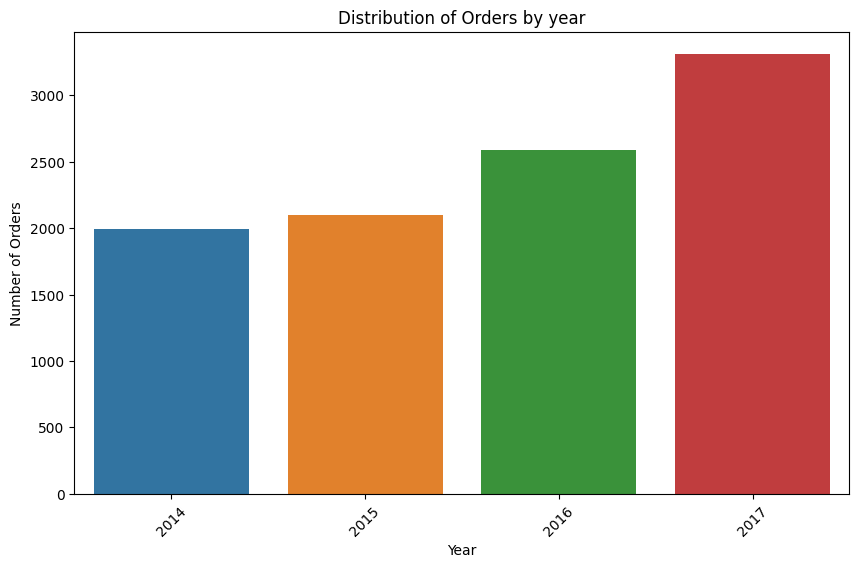

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='year', data=df)
plt.title('Distribution of Orders by year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(ticks=np.arange(len(df['year'].unique())),labels=sorted(df['year'].unique()),rotation=45)
plt.show()

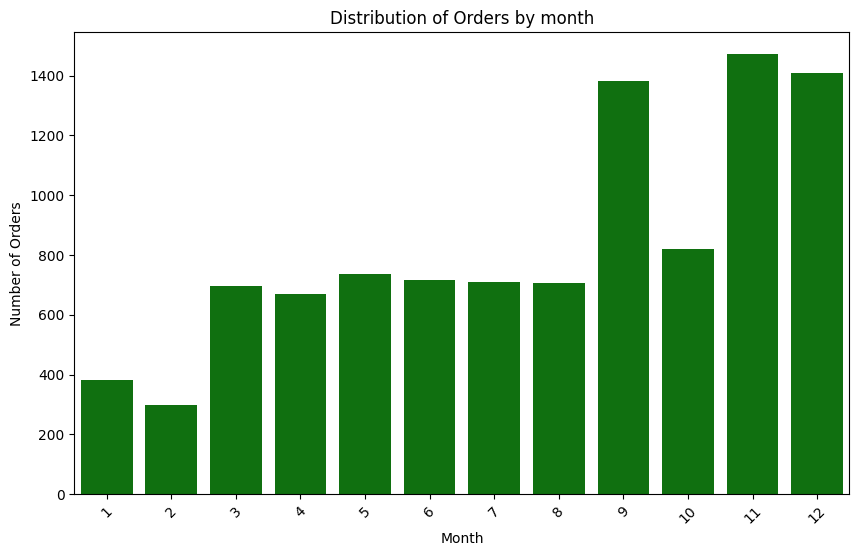

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='month',data=df,color='green')
plt.title('Distribution of Orders by month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.show()

## Is there a trend in sales or profit revenue?

### trend of sales by month

In [35]:
sales_by_month=df.groupby(pd.Grouper(key='OrderDate',freq='M'))['Sales'].sum()
profit_by_month=df.groupby(pd.Grouper(key='OrderDate',freq='M'))['Profit'].sum()

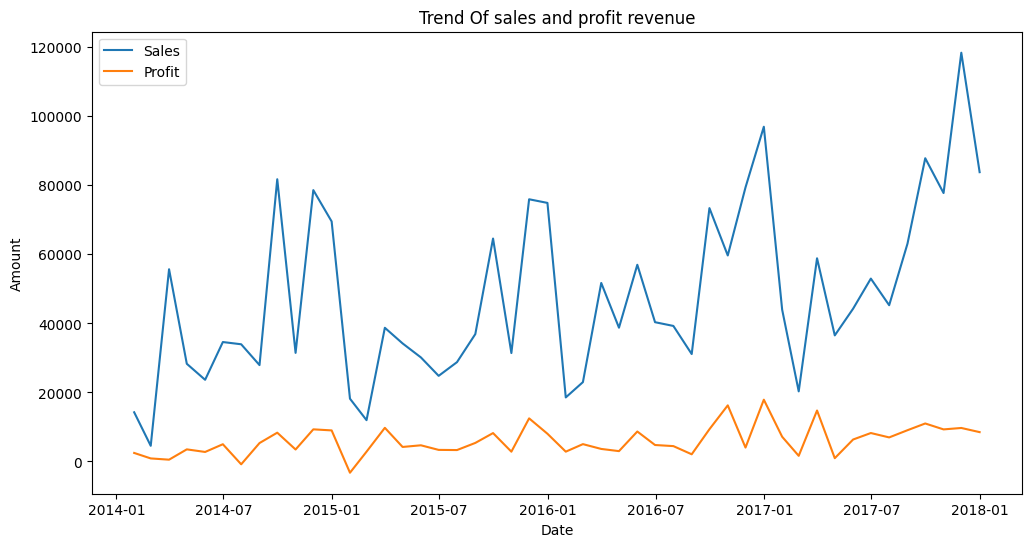

In [36]:
plt.figure(figsize=(12,6))
plt.plot(sales_by_month.index,sales_by_month.values,label='Sales')
plt.plot(profit_by_month.index,profit_by_month.values,label='Profit')
plt.title('Trend Of sales and profit revenue')
plt.xlabel('Date')
plt.ylabel('Amount')
#plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.legend()
plt.show()

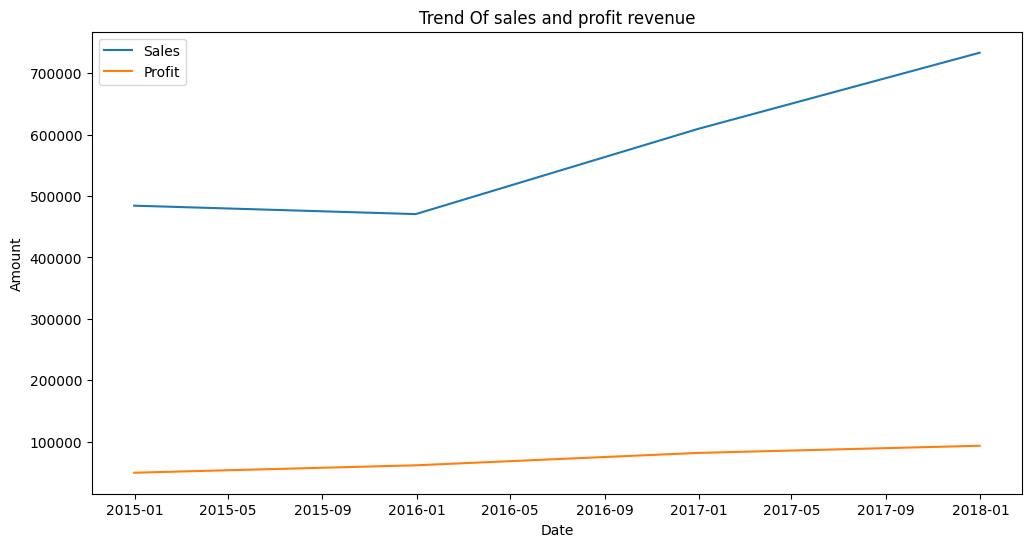

In [37]:
sales_by_year=df.groupby(pd.Grouper(key='OrderDate',freq='Y'))['Sales'].sum()
profit_by_year=df.groupby(pd.Grouper(key='OrderDate',freq='Y'))['Profit'].sum()
plt.figure(figsize=(12,6))
plt.plot(sales_by_year.index,sales_by_year.values,label='Sales')
plt.plot(profit_by_year.index,profit_by_year.values,label='Profit')
plt.title('Trend Of sales and profit revenue')
plt.xlabel('Date')
plt.ylabel('Amount')
#plt.xticks(ticks=np.arange(len(df['month'].unique())),labels=sorted(df['month'].unique()),rotation=45)
plt.legend()
plt.show()

## What is the average shipping time(difference between orderdate and shipdate)

In [38]:
df['shipping_time']=df['ShipDate']-df['OrderDate']
df['shipping_time_days']=df['shipping_time'].dt.days
average_st=df['shipping_time_days'].mean()
print('Average Shipping date:{:.2f}days'.format(average_st))

Average Shipping date:3.96days


# Customer Analysis

## Who are the top ten customers based on sales analysis


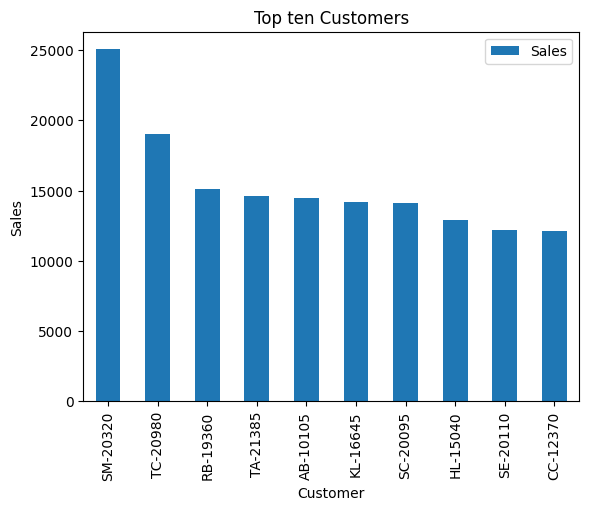

In [39]:
#Method 1
grouped_dfc=df.groupby('CustomerID').agg({'Sales':'sum'}).reset_index()
sorted_dfc=grouped_dfc.sort_values(by='Sales',ascending=False)
top_ten_customers=sorted_dfc[sorted_dfc['CustomerID'].isin(sorted_dfc.head(10)['CustomerID'])]
ax=top_ten_customers.plot(kind='bar',x='CustomerID',y=['Sales'])
ax.set_ylabel('Sales')
ax.set_xlabel('Customer')
ax.set_title('Top ten Customers')
plt.show()

In [40]:
#method 2

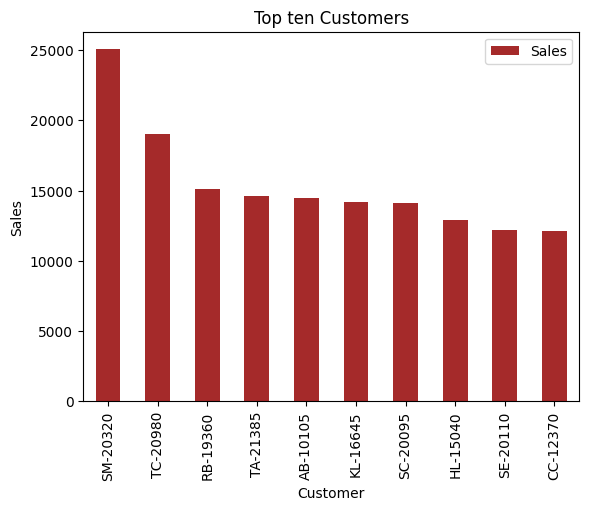

In [41]:
customer_sales=df.groupby('CustomerID')['Sales'].sum()
top_customers=customer_sales.nlargest(10)
ax=top_ten_customers.plot(kind='bar',x='CustomerID',y=['Sales'],color='brown')
ax.set_ylabel('Sales')
ax.set_xlabel('Customer')
ax.set_title('Top ten Customers')
plt.show()



## Are there rturning customers and what is the frequency of their returning also how many orders do the place

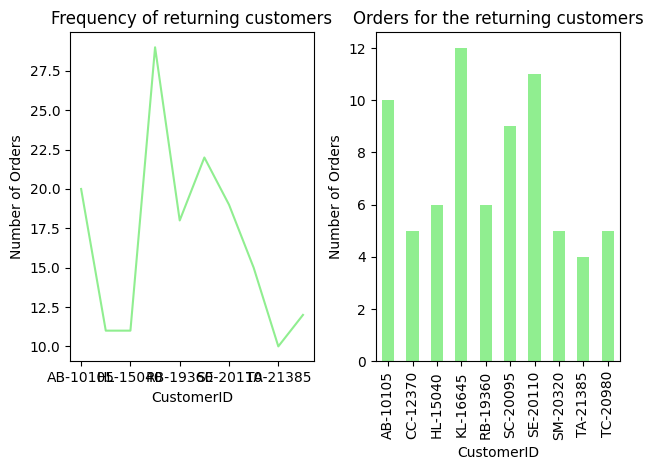

In [42]:
#Step 1: Indentifying the returning customers
customer_orders=df.groupby('CustomerID')['OrderID'].nunique()
ret_cust=customer_orders[customer_orders>1].index.tolist()
#step 2:The frequency
ret_cust_df=df[df['CustomerID'].isin(sorted_dfc.head(10)['CustomerID'])]
ret_cust_freq=ret_cust_df.groupby('CustomerID')['OrderID'].count()

plt.subplot(1,2,1)
ret_cust_freq.plot(kind='line',color='lightgreen')
plt.title('Frequency of returning customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')

plt.subplot(1,2,2)
ret_cust_df.groupby('CustomerID')['OrderID'].nunique().plot(kind='bar',color='lightgreen')
plt.title('Orders for the returning customers')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [43]:
print('Returning Customer frequency',ret_cust_freq)
print('-------------------------------------------\n')


Returning Customer frequency CustomerID
AB-10105    20
CC-12370    11
HL-15040    11
KL-16645    29
RB-19360    18
SC-20095    22
SE-20110    19
SM-20320    15
TA-21385    10
TC-20980    12
Name: OrderID, dtype: int64
-------------------------------------------



In [49]:
top_selling_products=df.groupby(['Category','SubCategory','ProductName'])['Sales'].sum().reset_index()
top_selling_products = top_selling_products.sort_values(['Category', 'SubCategory', 'Sales'], ascending=[True, True, False])
print("Top Selling Products by Category and Subcategory:")
print(top_selling_products.head(10))  

Top Selling Products by Category and Subcategory:
     Category SubCategory                                        ProductName  \
35  Furniture   Bookcases  Riverside Palais Royal Lawyers Bookcase, Royal...   
16  Furniture   Bookcases              DMI Eclipse Executive Suite Bookcases   
1   Furniture   Bookcases  Atlantic Metals Mobile 3-Shelf Bookcases, Cust...   
3   Furniture   Bookcases  Atlantic Metals Mobile 5-Shelf Bookcases, Cust...   
2   Furniture   Bookcases  Atlantic Metals Mobile 4-Shelf Bookcases, Cust...   
22  Furniture   Bookcases  O'Sullivan 2-Door Barrister Bookcase in Odessa...   
8   Furniture   Bookcases  Bush Heritage Pine Collection 5-Shelf Bookcase...   
17  Furniture   Bookcases  Global Adaptabilites Bookcase, Cherry/Storm Gr...   
32  Furniture   Bookcases     O'Sullivan Living Dimensions 5-Shelf Bookcases   
5   Furniture   Bookcases   Bush Andora Bookcase, Maple/Graphite Gray Finish   

       Sales  
35  15610.97  
16  11046.60  
1    7539.71  
3    5492

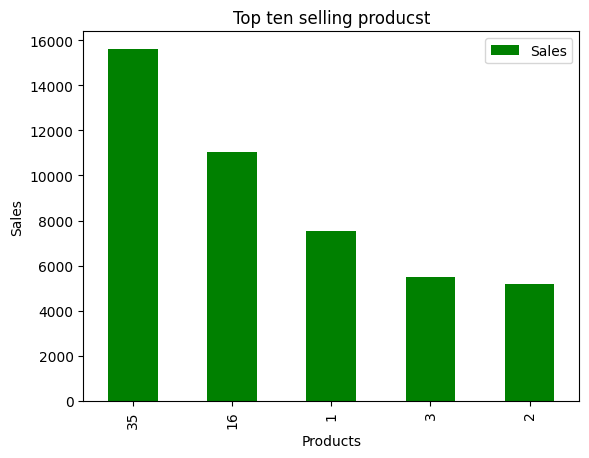

In [52]:
top_selling_products.head().plot(kind='bar',color='green')
plt.title('Top ten selling producst')
plt.xlabel('Products')
plt.ylabel('Sales')
plt.show()

C:\Users\Teacher-5B773C\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


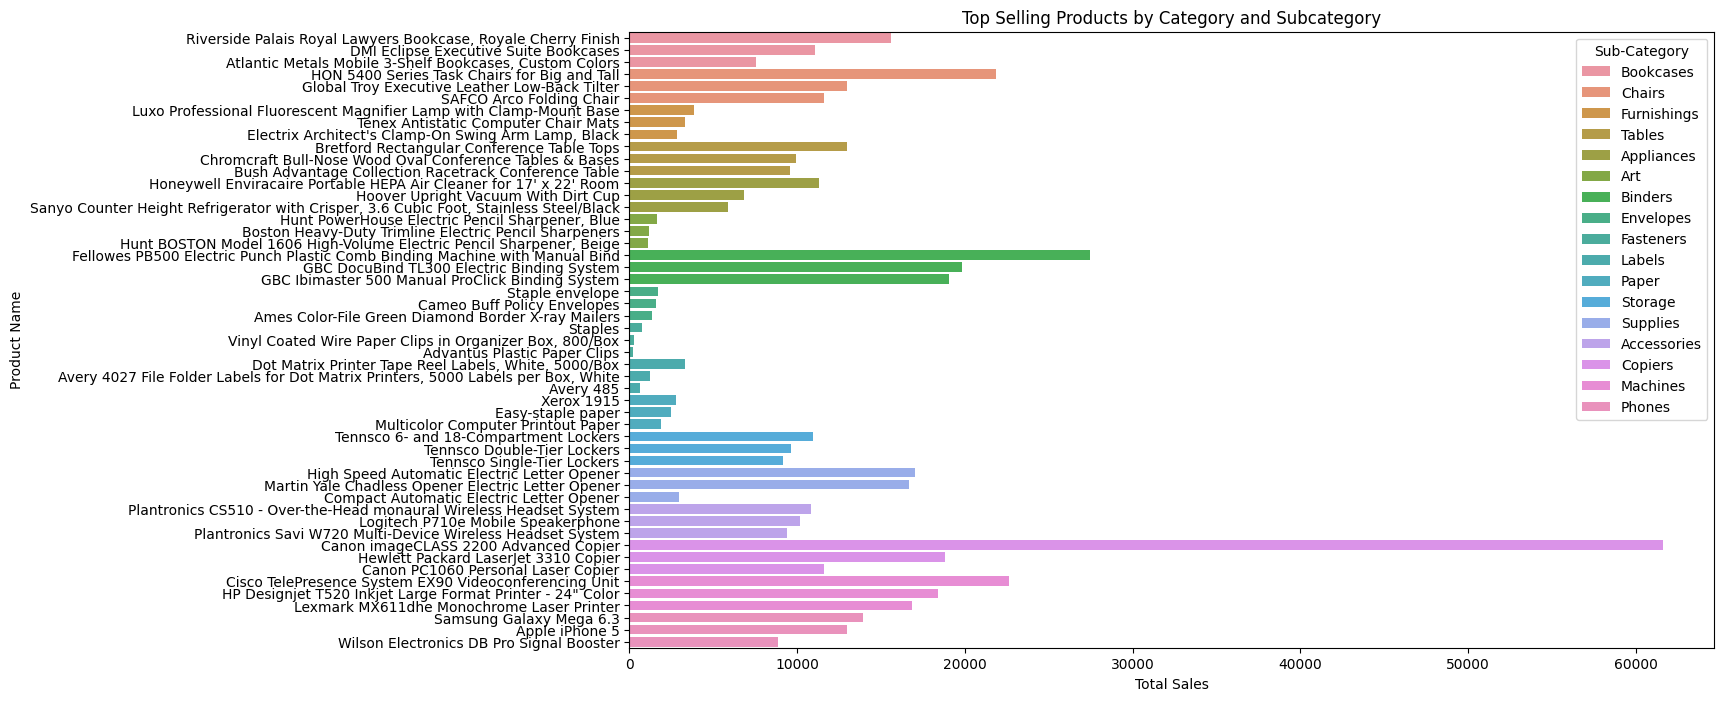

In [56]:
top_selling_products_plot = top_selling_products.groupby(['Category', 'SubCategory']).head(3)

plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='ProductName', hue='SubCategory', data=top_selling_products_plot, dodge=False)
plt.title('Top Selling Products by Category and Subcategory')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='Sub-Category')
plt.show()

In [57]:
# Count orders by country
orders_by_country = df['Country'].value_counts()

# Count orders by region
orders_by_region = df['State'].value_counts()

# Count orders by city
orders_by_city = df['City'].value_counts()

print("Distribution of Orders by Country:")
print(orders_by_country.head())

print("\nDistribution of Orders by Region:")
print(orders_by_region.head())

print("\nDistribution of Orders by City:")
print(orders_by_city.head())


Distribution of Orders by Country:
United States    9994
Name: Country, dtype: int64

Distribution of Orders by Region:
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

Distribution of Orders by City:
New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64


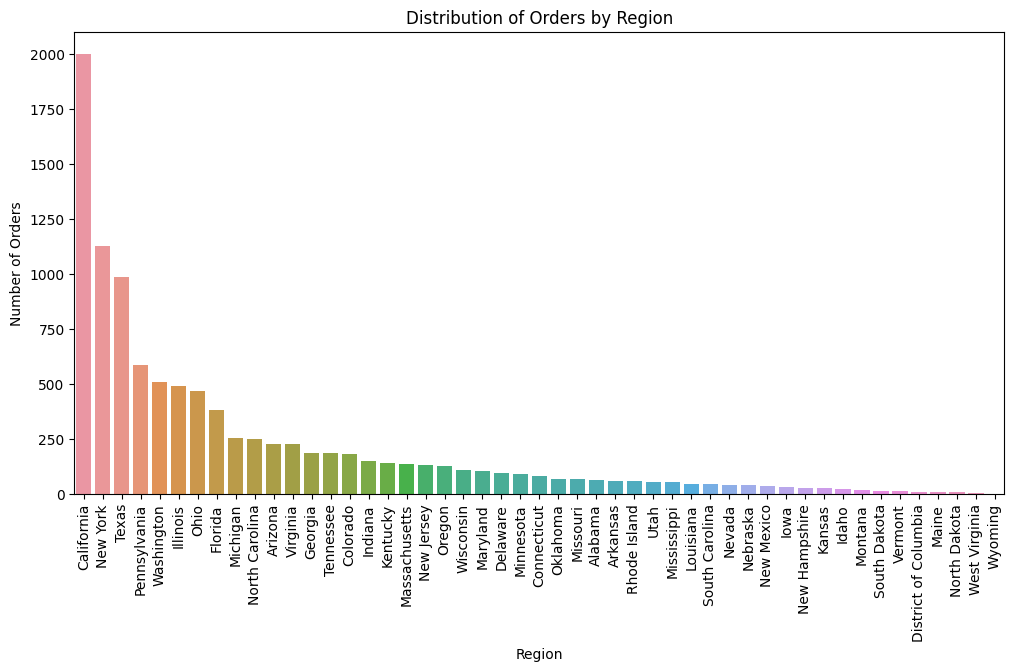

In [61]:
# Plot distribution of orders by country
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_by_region.index, y=orders_by_region.values)
plt.title('Distribution of Orders by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=90)
plt.show()


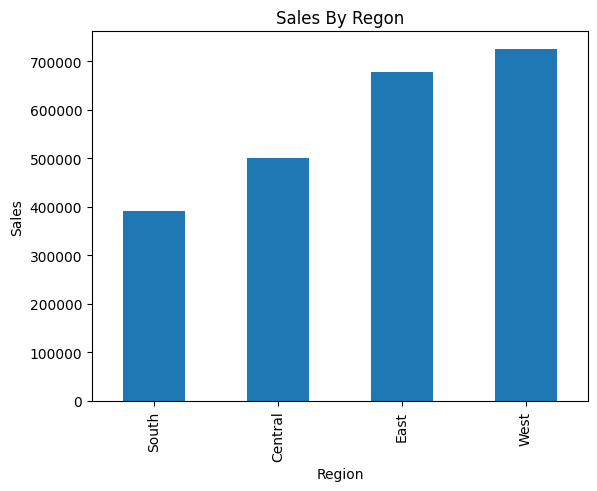

In [63]:
sales_by_region=df.groupby('Region')['Sales'].sum().sort_values()
sales_by_region.head().plot(kind='bar')
plt.title('Sales By Regon')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

In [65]:
#average sales and profit by ship mode
performance_by_ship_mode = df.groupby('ShipMode')[['Sales', 'Profit']].mean()

print("Performance by Ship Mode:")
print(performance_by_ship_mode)

Performance by Ship Mode:
                     Sales     Profit
ShipMode                             
First Class     228.497029  31.840020
Same Day        236.396169  29.266851
Second Class    236.089172  29.535470
Standard Class  227.583123  27.494881


In [47]:
df.columns

Index(['RowID', 'OrderID', 'OrderDate', 'ShipDate', 'ShipMode', 'CustomerID',
       'CustomerName', 'Segment', 'Country', 'City', 'State', 'PostalCode',
       'Region', 'ProductID', 'Category', 'SubCategory', 'ProductName',
       'Sales', 'Quantity', 'Discount', 'Profit', 'year', 'month',
       'shipping_time', 'shipping_time_days'],
      dtype='object')

In [69]:
salcorr=df['shipping_time_days'].corr(df['Sales'])
profcorr=df['shipping_time_days'].corr(df['Profit'])
print("Correlation between Shipping Time and Sales:", salcorr)
print("Correlation between Shipping Time and Profit:", profcorr)

Correlation between Shipping Time and Sales: -0.00735349719385642
Correlation between Shipping Time and Profit: -0.004649105951101683


In [70]:
discount_effect = df.groupby('Discount')[['Sales', 'Profit']].mean().reset_index()

print("Effect of Discount on Sales and Profit:")
print(discount_effect.head())

Effect of Discount on Sales and Profit:
   Discount       Sales     Profit
0      0.00  226.742074  66.900350
1      0.10  578.396809  96.055426
2      0.15  529.972885  27.288077
3      0.20  209.076916  24.702806
4      0.30  454.743436 -45.679912


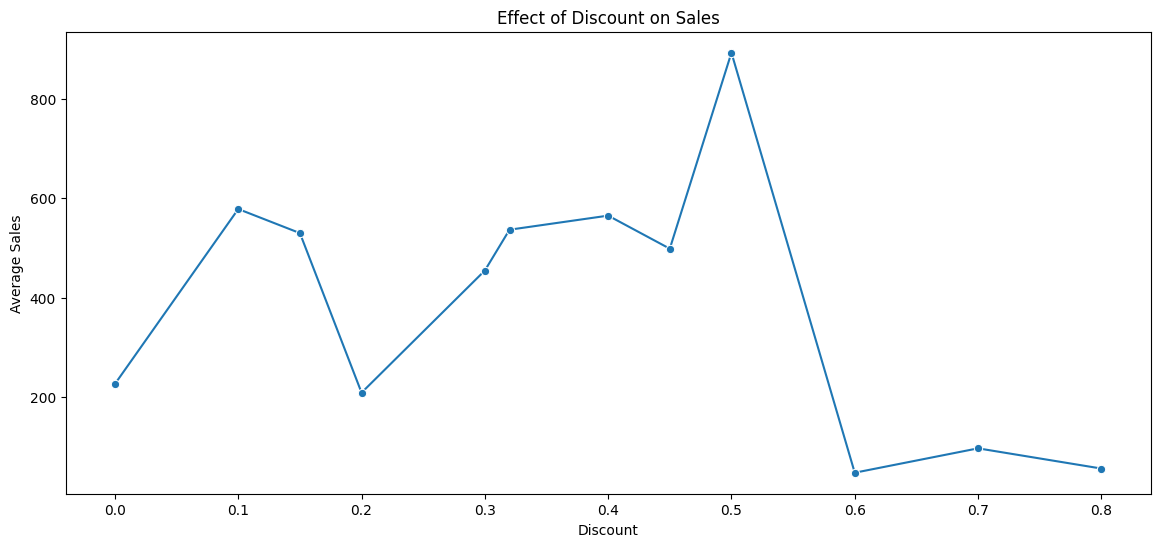

In [71]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Discount', y='Sales', data=discount_effect, marker='o')
plt.title('Effect of Discount on Sales')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.show()

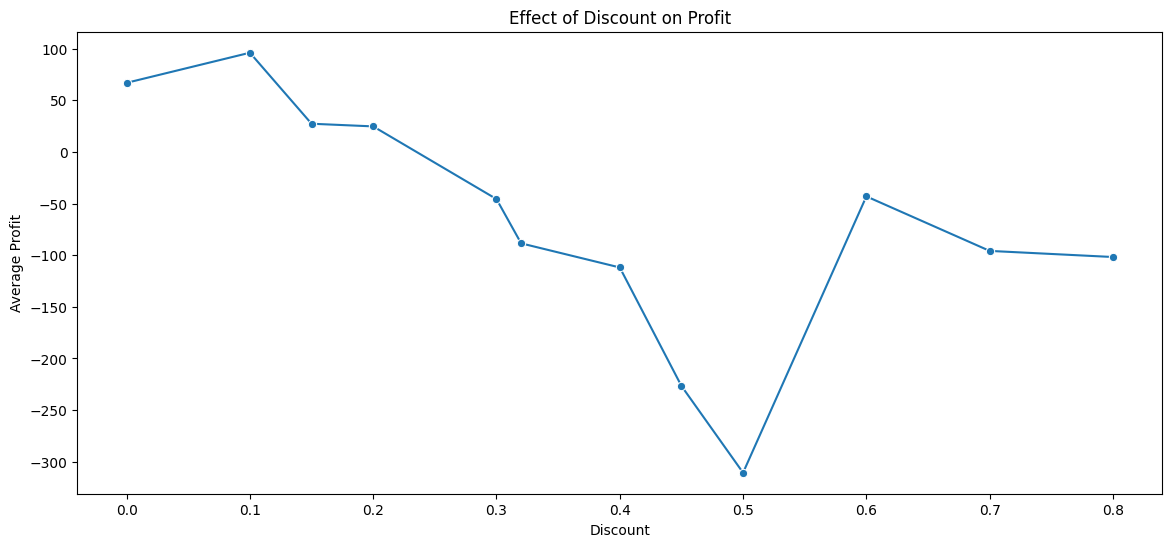

In [72]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='Discount', y='Profit', data=discount_effect, marker='o')
plt.title('Effect of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

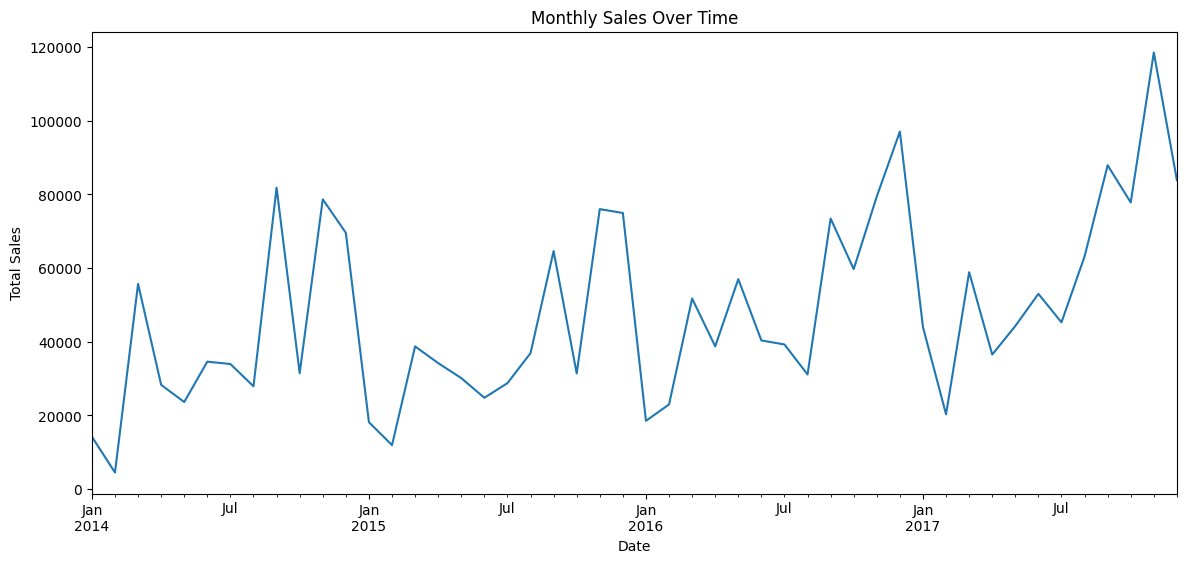

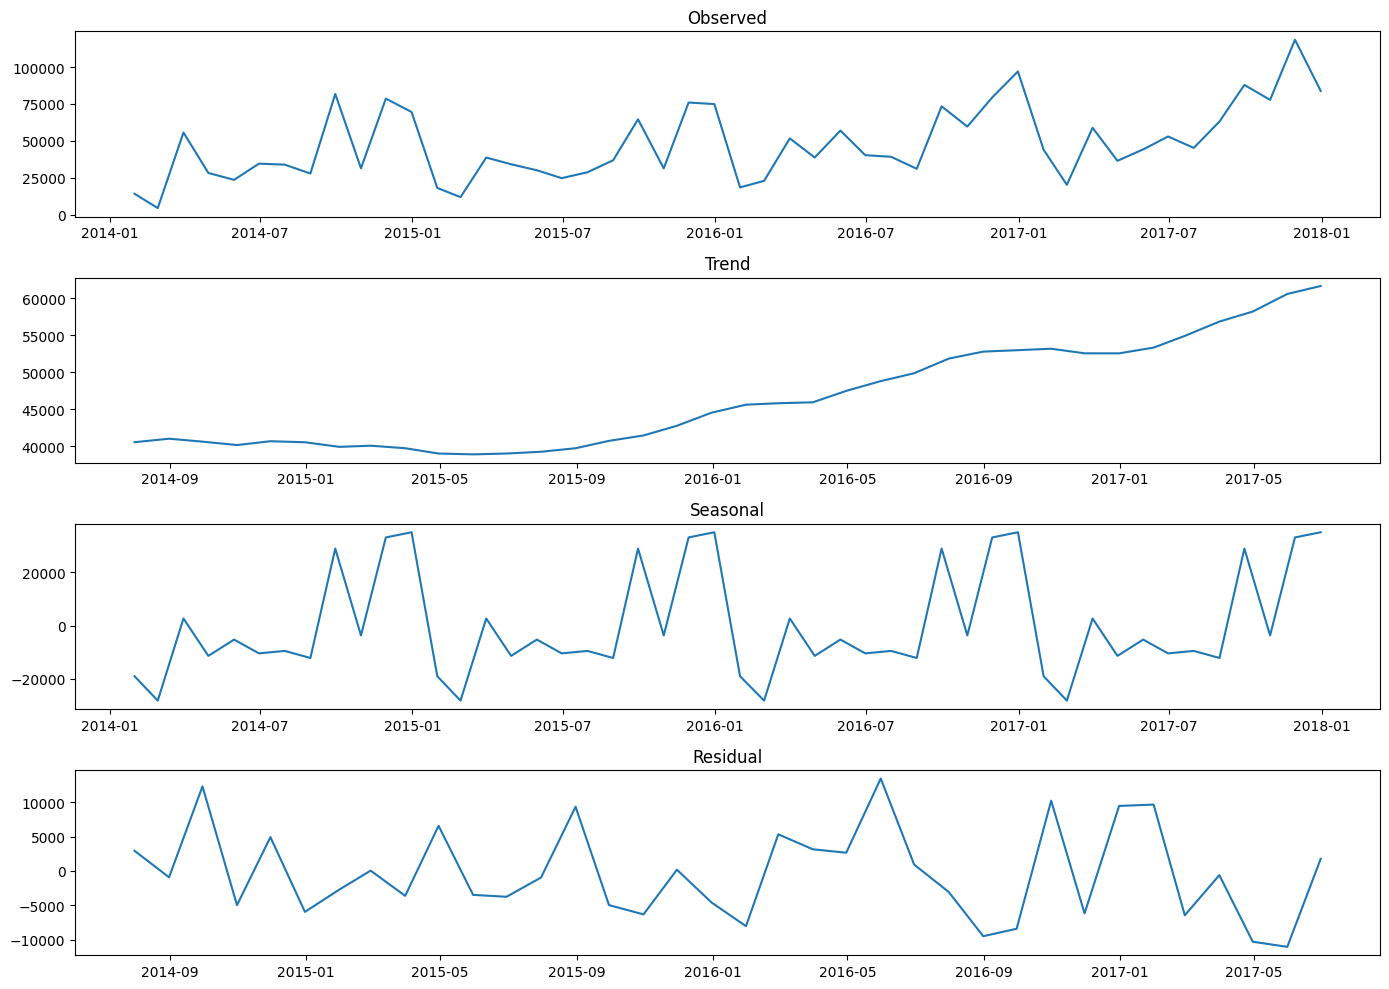

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure 'orderdate' is in datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# Set the 'orderdate' as the index
df.set_index('OrderDate', inplace=True)

# Resample sales data by month
monthly_sales = df['Sales'].resample('M').sum()

# Plot Monthly Sales Data
plt.figure(figsize=(14, 6))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

# Decompose the time series data
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot the decomposed components
plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()

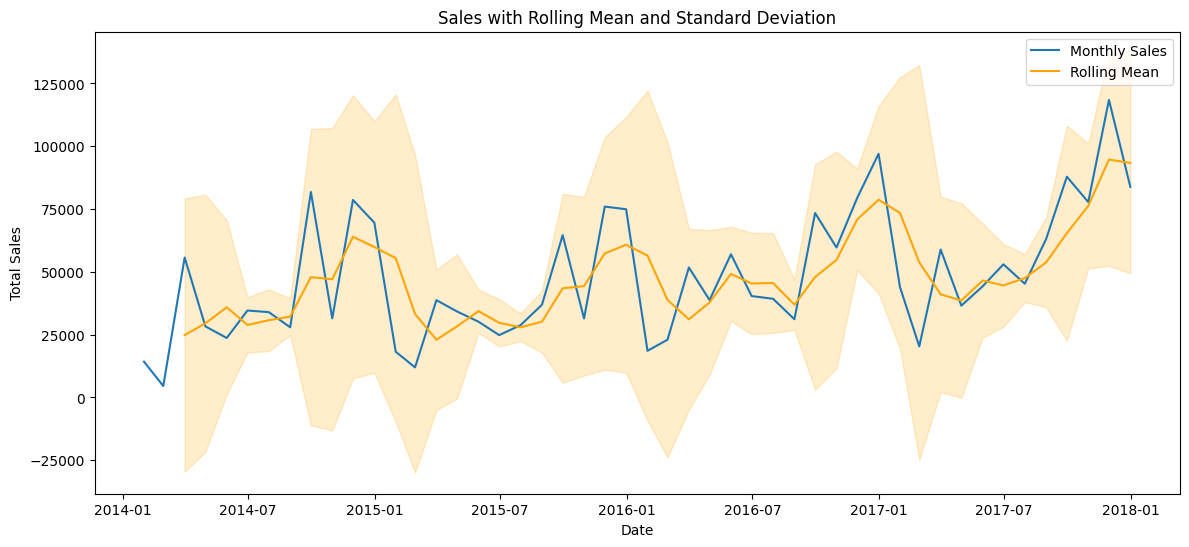

In [78]:

rolling_mean = monthly_sales.rolling(window=3).mean()
rolling_std = monthly_sales.rolling(window=3).std()


plt.figure(figsize=(14, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.plot(rolling_mean, color='orange', label='Rolling Mean')
plt.fill_between(rolling_mean.index,
                 rolling_mean - 2 * rolling_std,
                 rolling_mean + 2 * rolling_std,
                 color='orange', alpha=0.2)
plt.title('Sales with Rolling Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.show()


In [85]:
prod_prof=df.groupby('ProductName')[['Profit','Discount']].sum()
print(prod_prof.head(10))

                                                    Profit  Discount
ProductName                                                         
"While you Were Out" Message Book, One Form per...   10.39       0.4
#10 Gummed Flap White Envelopes, 100/Box             16.77       0.4
#10 Self-Seal White Envelopes                        52.12       0.2
#10 White Business Envelopes,4 1/8 x 9 1/2          223.12       0.4
#10- 4 1/8" x 9 1/2" Recycled Envelopes             115.30       0.8
#10- 4 1/8" x 9 1/2" Security-Tint Envelopes         64.86       0.6
#10-4 1/8" x 9 1/2" Premium Diagonal Seam Envel...   63.75       0.2
#6 3/4 Gummed Flap White Envelopes                   24.94       0.8
1.7 Cubic Foot Compact "Cube" Office Refrigerators  578.68       0.4
1/4 Fold Party Design Invitations & White Envel...   22.71       0.2


In [86]:
prod_proff=pd.DataFrame(prod_prof).T
prod_proff

ProductName,"""While you Were Out"" Message Book, One Form per Page","#10 Gummed Flap White Envelopes, 100/Box",#10 Self-Seal White Envelopes,"#10 White Business Envelopes,4 1/8 x 9 1/2","#10- 4 1/8"" x 9 1/2"" Recycled Envelopes","#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes","#10-4 1/8"" x 9 1/2"" Premium Diagonal Seam Envelopes",#6 3/4 Gummed Flap White Envelopes,"1.7 Cubic Foot Compact ""Cube"" Office Refrigerators","1/4 Fold Party Design Invitations & White Envelopes, 24 8-1/2"" X 11"" Cards, 25 Env./Pack",...,Zebra ZM400 Thermal Label Printer,Zebra Zazzle Fluorescent Highlighters,Zipper Ring Binder Pockets,i.Sound Portable Power - 8000 mAh,iHome FM Clock Radio with Lightning Dock,"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",iOttie HLCRIO102 Car Mount,iOttie XL Car Mount,invisibleSHIELD by ZAGG Smudge-Free Screen Protector,netTALK DUO VoIP Telephone Service
Profit,10.39,16.77,52.12,223.12,115.3,64.86,63.75,24.94,578.68,22.71,...,3343.53,20.65,11.73,-58.83,17.5,115.64,-11.99,-50.37,171.28,430.41
Discount,0.40,0.40,0.20,0.40,0.8,0.60,0.20,0.80,0.40,0.20,...,0.00,1.00,4.90,0.60,1.2,0.40,0.80,0.40,1.20,1.20
